In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

# We will use Random Forest to describes which features are relevant

In [13]:
df = pd.read_csv('dfok.csv')
X = pd.read_csv('dfok.csv')
y = X['Response']
X = X.drop('Response',axis=1)
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [5]:
#Split our dataframe
forest = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [6]:
#Train the model
forest.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
#Just to see..
y_pred = forest.predict(X_test)

In [8]:
print(f'Test_score: {forest.score(X_test, y_test)}')
print(f'Train_score: {forest.score(X_train, y_train)}')

Test_score: 0.29299761002282754
Train_score: 0.8789954054268002


# Now the model gives us the features with the most relevance

In [9]:
forest.feature_importances_

array([6.01206707e-02, 6.31648524e-02, 6.13587986e-03, 7.23802671e-03,
       1.07613376e-01, 7.57367480e-02, 3.34978770e-02, 8.88827680e-02,
       3.39349867e-02, 3.86346533e-02, 4.64059475e-02, 3.39469379e-02,
       2.38312414e-02, 3.57973878e-02, 3.72940593e-02, 4.32804925e-02,
       5.39895591e-02, 3.29789456e-03, 1.13189354e-01, 2.68495034e-02,
       4.68980722e-03, 1.55006519e-03, 1.43214123e-03, 1.28672430e-03,
       5.09961873e-03, 4.54472832e-03, 6.41440578e-03, 6.51010688e-05,
       0.00000000e+00, 8.71370165e-03, 7.99625847e-03, 1.01429588e-02,
       8.08667711e-03, 5.81502600e-03, 1.32057013e-03])

<BarContainer object of 35 artists>

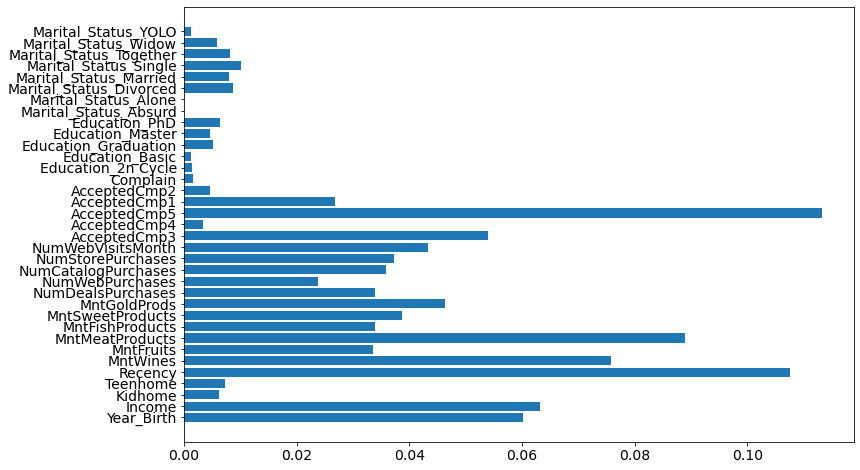

In [10]:
# We plot
plt.barh(X.columns, forest.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

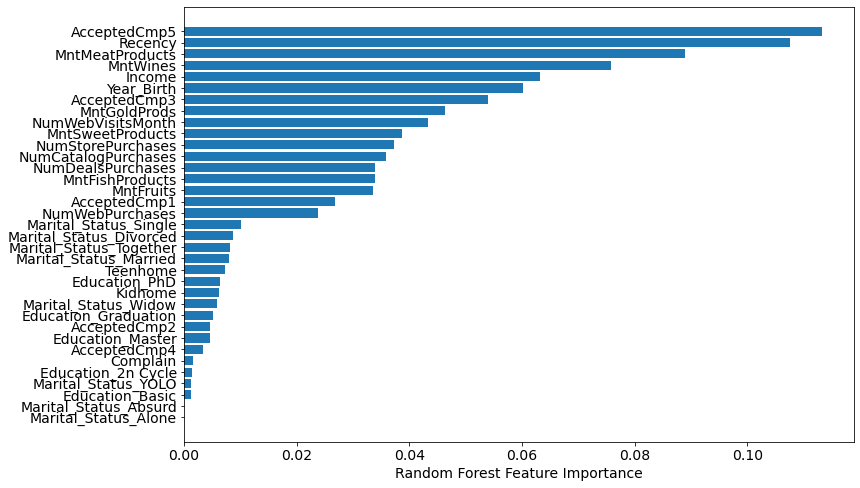

In [11]:
#order de plot
sorted_idx = forest.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

We note that the last 18 Features can be drop

In [16]:
# Drop these Features
df = df.drop(['Marital_Status_Alone','Marital_Status_Absurd','Marital_Status_YOLO','Marital_Status_Single', 'Marital_Status_Divorced', 'Marital_Status_Together', 'Marital_Status_Married', 'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic', 'Education_Master', 'Education_Graduation','Education_PhD', 'Complain', 'AcceptedCmp4', 'AcceptedCmp2'], axis=1)

In [18]:
df.to_csv('df_to_model.csv', index=False)

In [19]:
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,1,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0
